<h1 style="font-size:3rem;color:orange;">Directing User Subscriptions📱</h1>

<h2 style="font-size:2rem;color:orange;">EDA (Exploratory Data Analysis) and Feature Engineering</h2>

#### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

#### Import Data

In [2]:
df_users = pd.read_csv("../data/raw/app-user-data.csv")

#### Raw Data Peek 👀

In [3]:
df_users.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
df_users.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [5]:
df_users.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


- Above we observe baseline statistics and note that we have been provided with 50,000 samples of data
- With 10 numerical & categorical features combined

# Data Cleaning <img src="https://media3.giphy.com/media/XPgZ5Mw89gX5oWxJbA/giphy.gif?cid=ecf05e47smjbcfh88elxmone9mj55ajymh0e6hkx30dshnq0&ep=v1_gifs_related&rid=giphy.gif&ct=s" width="50" alt="Stat Bars">

In [6]:
# Get the number of null values and corresponding columns
null_counts = df_users.isnull().sum()
null_columns = null_counts[null_counts > 0].index

# Create a DataFrame from the null_counts Series
null_info_df = pd.DataFrame({'Column': null_counts.index, 'Null Count': null_counts.values})

# Display the DataFrame
null_info_df

,Column,Null Count
0,user,0
1,first_open,0
2,dayofweek,0
3,hour,0
4,age,0
5,screen_list,0
6,numscreens,0
7,minigame,0
8,used_premium_feature,0
9,enrolled,0


### Null Values

We observe there is no 'enrolled_date' for 18,926 of our samples due to users that did not enroll in the paid subscription. For now, we convert these values to "Not a Timestamp" to indicate that we recognize them and later process this field in Feature Engineering ⚒️

In [7]:
# Convert the 'first_open' and 'enrolled_date' columns to datetime format
df_users['first_open'] = pd.to_datetime(df_users['first_open'])
df_users['enrolled_date'] = pd.to_datetime(df_users['enrolled_date'])

# Convert null values in 'enrolled_date' 
missing_date = pd.NaT

# Fill missing values with a new date-time format
df_users['enrolled_date'] = df_users['enrolled_date'].fillna(pd.to_datetime(missing_date))

### Extractions

In [8]:
# Convert the 'hour' field for when the app was first opened to a string for extraction, then convert to an integer
df_users['hour'] = df_users.hour.str.slice(1, 3).astype(int)

df_users.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


### Outliers Function

In [9]:
from scipy.stats import zscore

def remove_outliers_with_threshold(your_threshold, your_df, column_name):
    """
    Removes outliers beyond a threshold from a column within a DataFrame.
    Accepts the threshold, a DataFrame, and the name of the column
    """
    # Set the threshold for identifying outliers
    threshold = your_threshold

    # Calculate z-scores for the filter column
    z_scores = zscore(your_df[column_name])
    
    # Create a boolean mask to identify outliers
    outlier_mask = abs(z_scores) > threshold
    
    # Filter the DataFrame to exclude rows with outliers
    df_wo_outliers = your_df[~outlier_mask].copy()
    
    print(f"Filtered the DataFrame to exclude rows in '{column_name}' beyond a {your_threshold} threshold for identifying outliers")
    return df_wo_outliers

# Data Visualizations <img src="../../images/plot.gif" width="52" alt="Stat Bars">

- Numerical Features

In [10]:
numerical_features = ['age', 'numscreens']

df_users_numerical = df_users[numerical_features].copy()

- Categorical Features

In [11]:
categorical_features = ['first_open', 'screen_list', 'enrolled_date', 'enrolled', 'dayofweek', 'hour', 'minigame', 'used_premium_feature', 'liked']

df_users_categorical = df_users[categorical_features].copy()

### Pair Plots

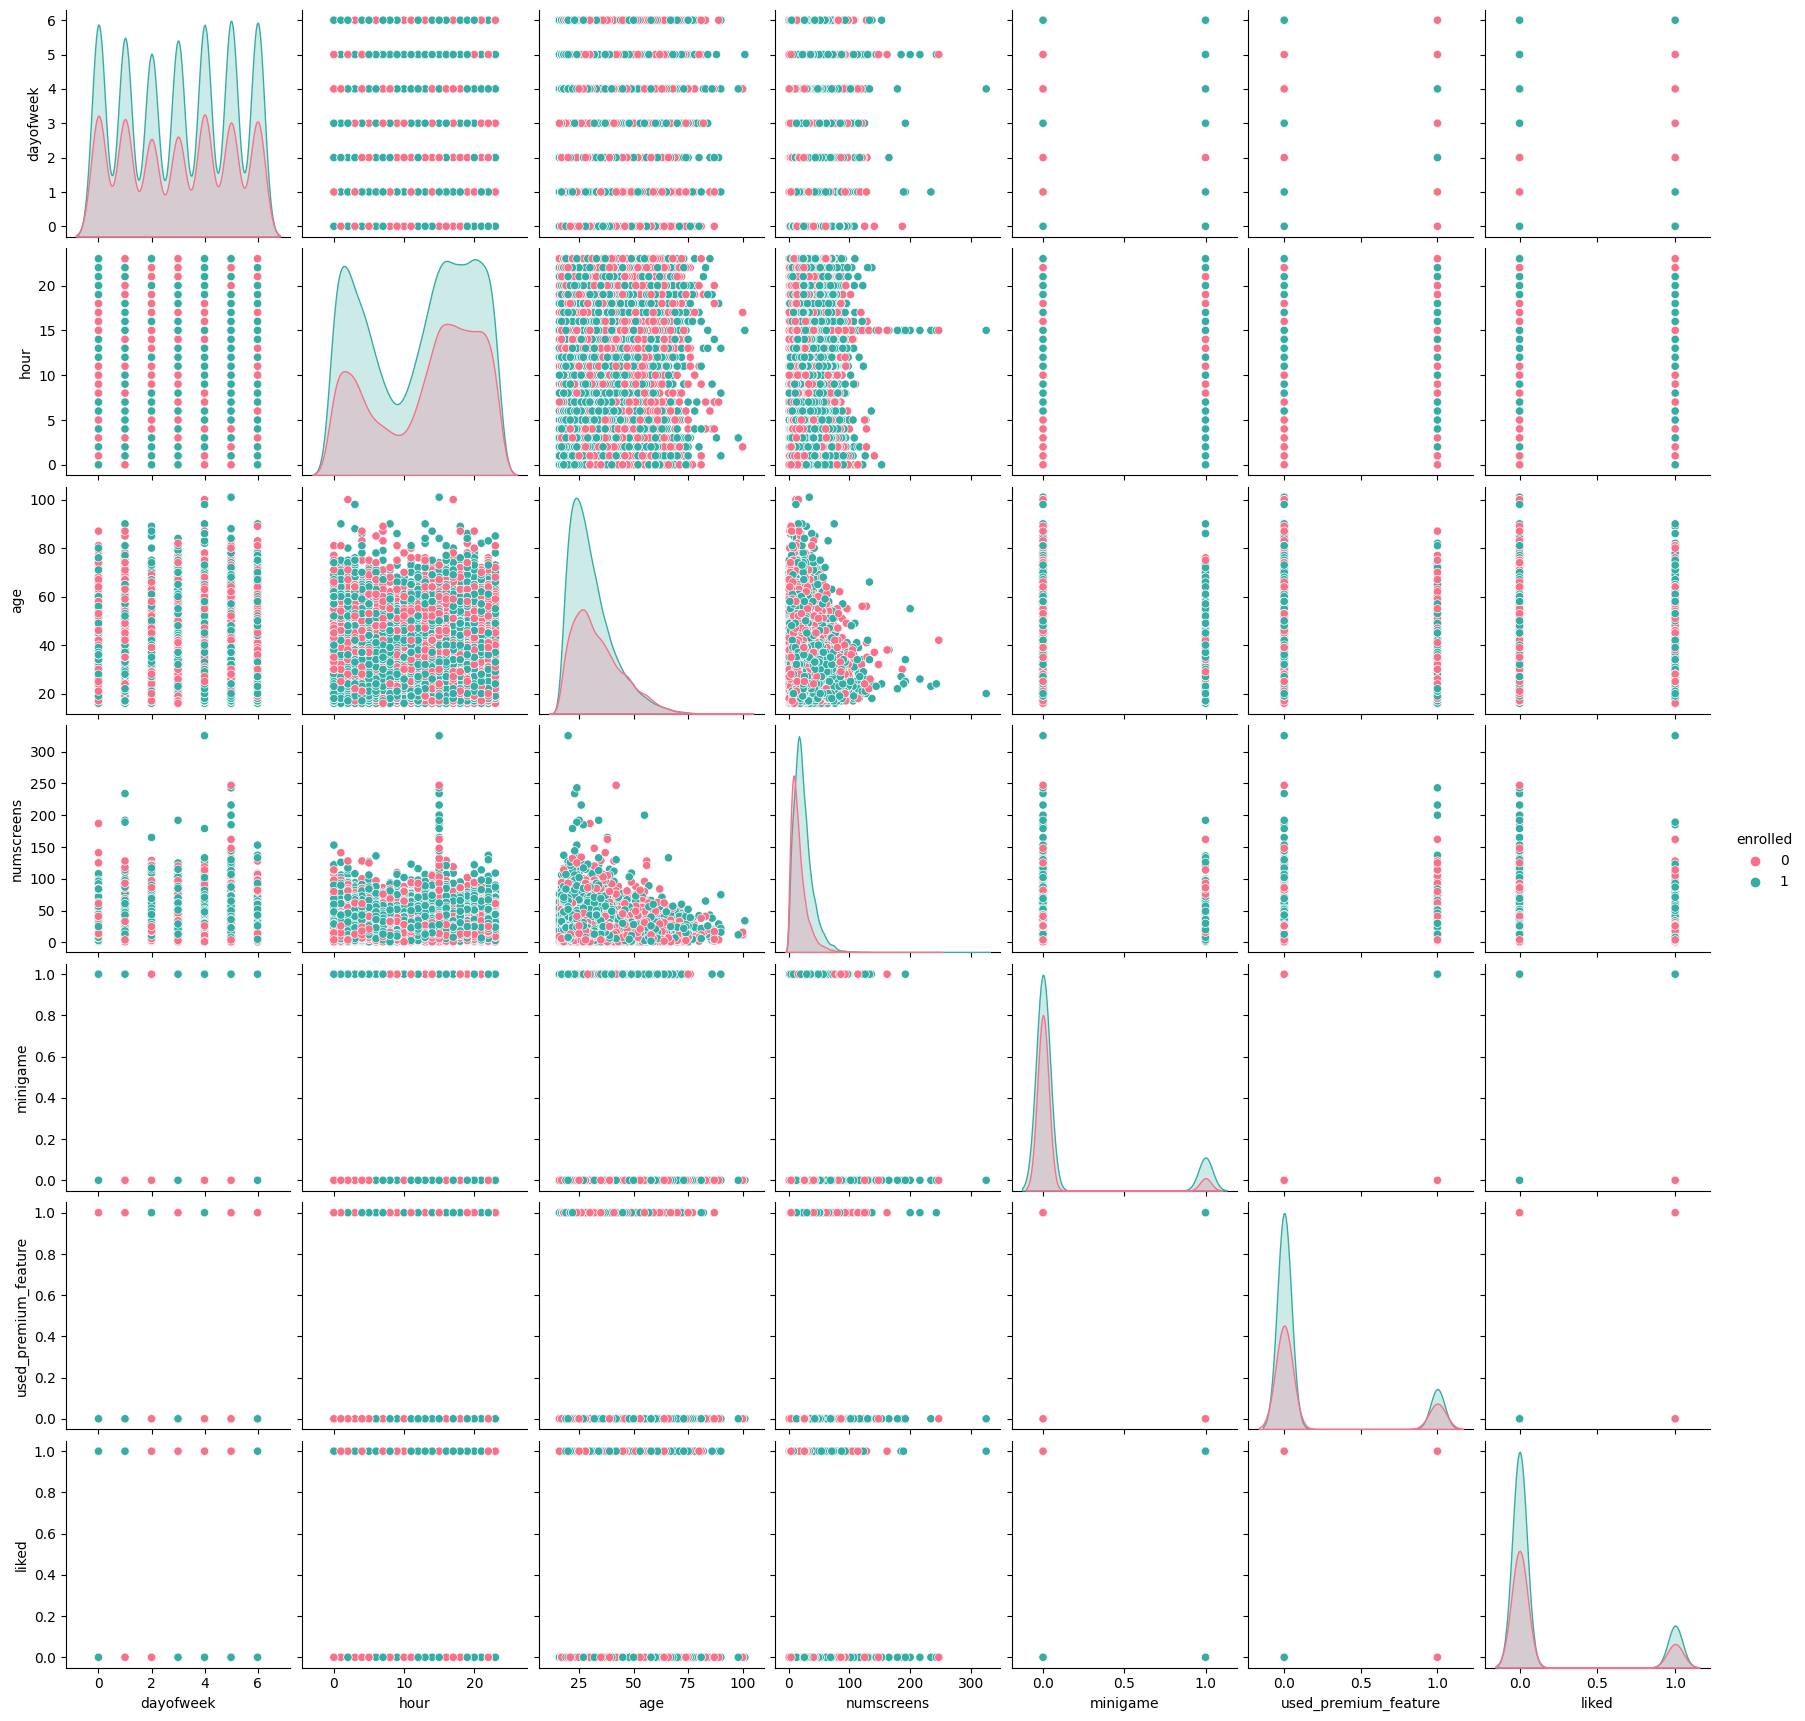

In [12]:
pairplot_df = df_users.copy().drop(columns=['user'])

# Seaborn pairplot passing the 'enrolled' label for hue
sn.pairplot(pairplot_df, hue="enrolled", palette="husl");

Process **'enrolled_date'** for exploration 

In [13]:
# Extract month and hour into separate columns for 'enrolled_date'
df_users_categorical['enrolled_date_month'] = df_users_categorical['enrolled_date'].dt.month
df_users_categorical['enrolled_date_hour'] = df_users_categorical['enrolled_date'].dt.hour

# Extract month into separate column for 'first_open'
df_users_categorical['first_open_month'] = df_users_categorical['first_open'].dt.month

# Display modified dataframe
df_users_categorical.head()

,first_open,screen_list,enrolled_date,enrolled,dayofweek,hour,minigame,used_premium_feature,liked,enrolled_date_month,enrolled_date_hour,first_open_month
0,2012-12-27 02:14:51.273,"idscreen,joinscreen,Cycle,product_review,ScanP...",NaT,0,3,2,0,0,0,NaN,NaN,12
1,2012-12-02 01:16:00.905,"joinscreen,product_review,product_review2,Scan...",NaT,0,6,1,0,0,0,NaN,NaN,12
2,2013-03-19 19:19:09.157,"Splash,Cycle,Loan",NaT,0,1,19,0,1,1,NaN,NaN,3
3,2013-07-05 16:08:46.354,"product_review,Home,product_review,Loan3,Finan...",2013-07-05 16:11:49.513,1,4,16,0,0,0,7.0,16.0,7
4,2013-02-26 18:50:48.661,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",2013-02-26 18:56:37.841,1,1,18,0,0,1,2.0,18.0,2


Inspect **'screen_list'** 

In [14]:
# Set maximum column width to display
pd.set_option('display.max_colwidth', None)

df_users_categorical[['enrolled', 'screen_list']].head()

,enrolled,screen_list
0,0,"idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login"
1,0,"joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2"
2,0,"Splash,Cycle,Loan"
3,1,"product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2"
4,1,"idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review"


- We observe potential insights within the **'screen_list'** field and will process this data in Feature Engineering ⚒️

In [15]:
# Reset maximum column width
pd.reset_option('display.max_colwidth')

### Histograms

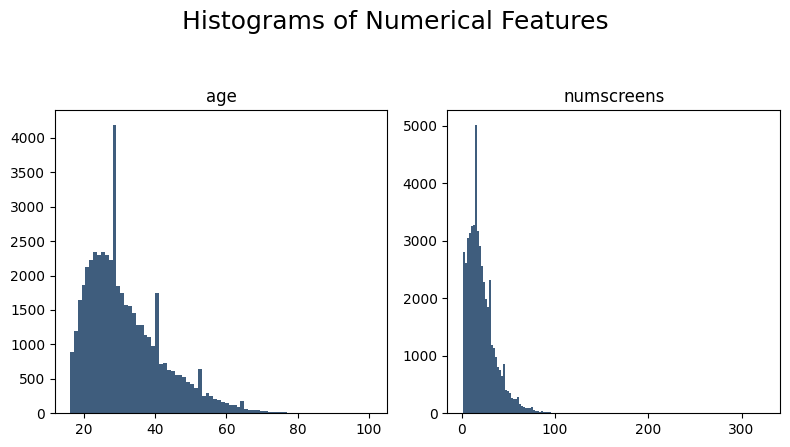

In [16]:
# Set figure size & title
plt.figure(figsize=(8, 8))
plt.suptitle('Histograms of Numerical Features', fontsize = 18)

# Create subplots with increased spacing
plt.subplots_adjust(hspace=0.5, wspace=0.7)

for col in range(1, df_users_numerical.shape[1]+1):
    plt.subplot(2, 2, col)
    feat = plt.gca()
    feat.set_title(df_users_numerical.columns.values[col-1])
    vals = np.size(df_users_numerical.iloc[:, col-1].unique())
    plt.hist(df_users_numerical.iloc[:, col - 1], bins=vals, color='#3F5D7D')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

- We note the skew within our numerical features

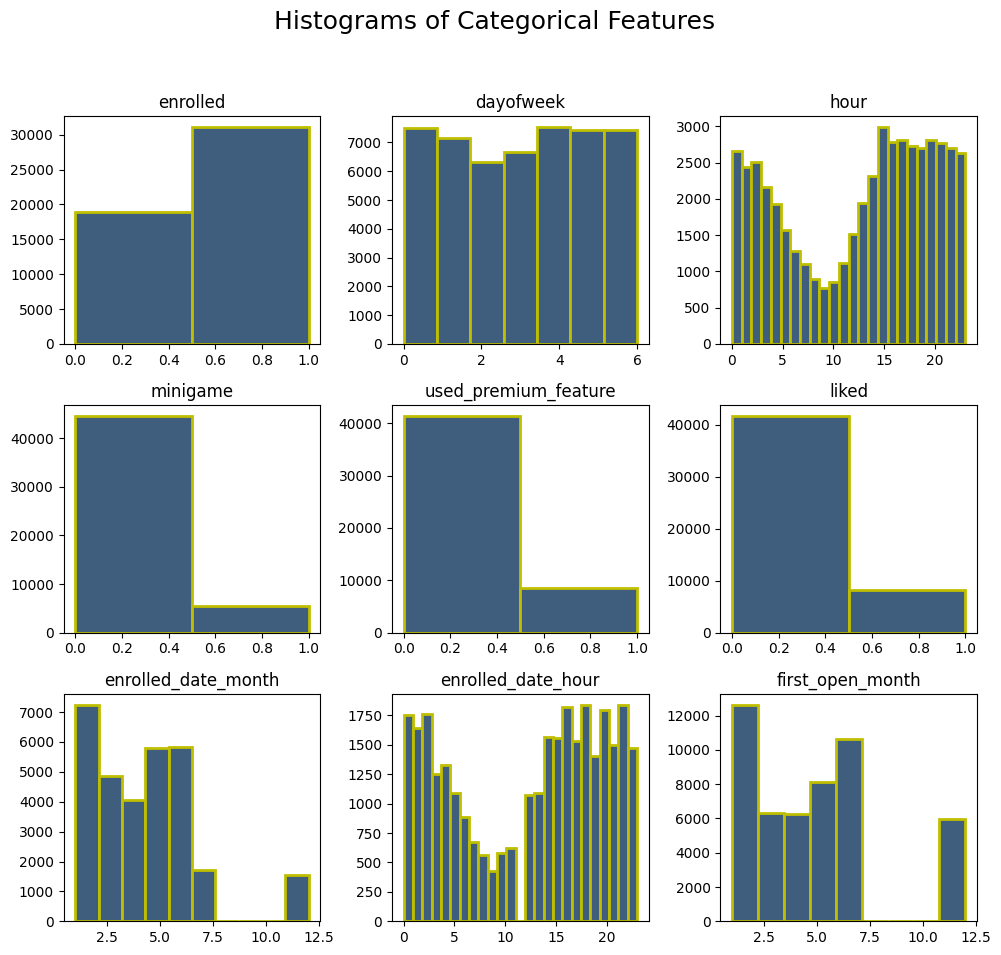

In [17]:
# Filter fields
df_cat_filter = df_users_categorical.drop(columns=['first_open', 'screen_list', 'enrolled_date']).copy()

# Set figure size & title
plt.figure(figsize=(10, 10))
plt.suptitle('Histograms of Categorical Features', fontsize = 18)

# Create subplots with increased spacing
plt.subplots_adjust(hspace=0.5, wspace=0.7)

for col in range(1, df_cat_filter.shape[1] + 1):
    plt.subplot(3, 3, col)
    feat = plt.gca()
    feat.set_title(df_cat_filter.columns.values[col - 1])
    vals = np.size(df_cat_filter.iloc[:, col - 1].unique())
    plt.hist(df_cat_filter.iloc[:, col - 1], bins=vals, color='#3F5D7D', edgecolor='y', linewidth=2.0)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Label Distribution

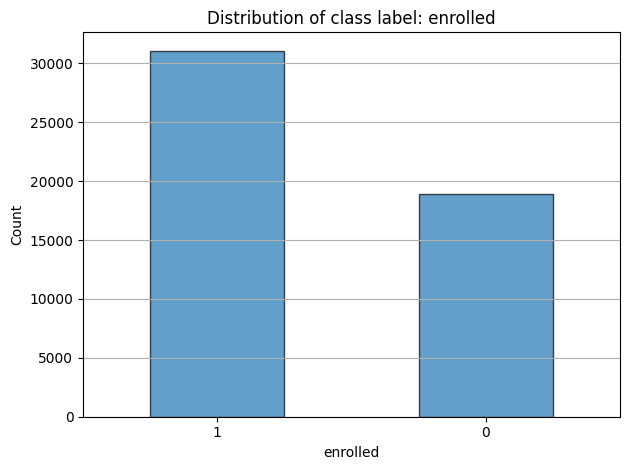

Users Enrolled:     31074 out of 50000
Users Not Enrolled: 18926 out of 50000


In [18]:
# Count the occurrences of each value
value_counts = df_users['enrolled'].value_counts()

# Create a bar plot
value_counts.plot(kind='bar', edgecolor='black', alpha=0.7)
plt.title("Distribution of class label: enrolled")
plt.xlabel("enrolled")
plt.ylabel("Count")
plt.xticks(rotation=0)  # keep x-axis labels horizontal
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Get the number of samples
samples = df_users.shape[0]

# Display counts
print("Users Enrolled:    ", (df_users.enrolled == 1).sum(), f'out of {samples}')
print("Users Not Enrolled:",(df_users.enrolled == 0).sum(), f'out of {samples}')

We observe a **class imbalance** in our label data

### Box Plots

In [19]:
# Dictionary of colors for box plot elements
colors = {
  'boxes': 'skyblue',
  'whiskers': 'blue',
  'medians': 'red',
  'caps': 'grey'
  }

- Numerical Field: **age**

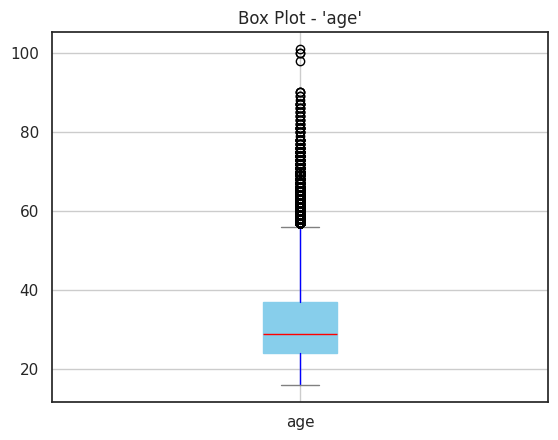

count    49859.000000
mean        31.733007
std         10.806268
min         16.000000
25%         24.000000
50%         29.000000
75%         37.000000
max        101.000000
Name: age, dtype: float64

In [40]:
df_users_numerical.boxplot(column=['age'], color=colors, patch_artist=True)
plt.title("Box Plot - 'age'")
plt.show()

df_users_numerical['age'].describe()

- Numerical Field: **numscreens**

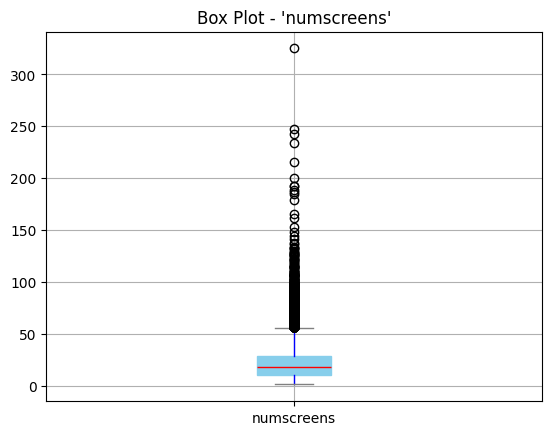

count    50000.000000
mean        21.095900
std         15.728812
min          1.000000
25%         10.000000
50%         18.000000
75%         28.000000
max        325.000000
Name: numscreens, dtype: float64

In [21]:
df_users_numerical.boxplot(column = ['numscreens'], color=colors, patch_artist=True)
plt.title("Box Plot - 'numscreens'")
plt.show()

df_users_numerical['numscreens'].describe()

Here we define a forgiving threshold for removing outliers in 'numscreens' that if utilized will effect less than 150 of our 50,000 samples

Filtered the DataFrame to exclude rows in 'numscreens' beyond a 4.5 threshold for identifying outliers


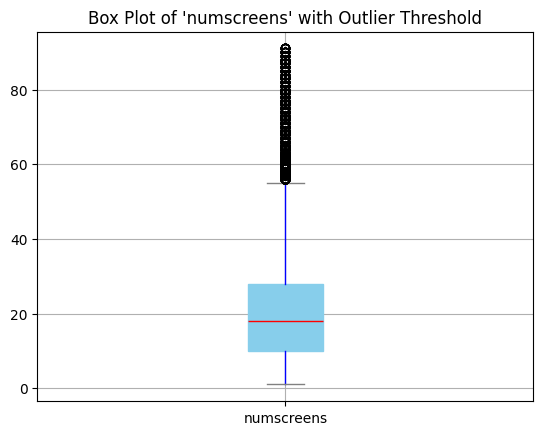

count    49859.000000
mean        20.824545
std         14.778414
min          1.000000
25%         10.000000
50%         18.000000
75%         28.000000
max         91.000000
Name: numscreens, dtype: float64

In [22]:
# Call the function
df_users_wo_outliers = remove_outliers_with_threshold(4.5, df_users, 'numscreens')
  
# Display box plot
df_users_wo_outliers.boxplot(column='numscreens', color=colors, patch_artist=True)
plt.title("Box Plot of 'numscreens' with Outlier Threshold")
plt.show()

df_users_wo_outliers['numscreens'].describe()

Below we **remove outliers** in 'numscreens' from our datasets 

In [23]:
df_users = remove_outliers_with_threshold(4.5, df_users, 'numscreens')
df_users_numerical = remove_outliers_with_threshold(4.5, df_users_numerical, 'numscreens')

Filtered the DataFrame to exclude rows in 'numscreens' beyond a 4.5 threshold for identifying outliers
Filtered the DataFrame to exclude rows in 'numscreens' beyond a 4.5 threshold for identifying outliers


### Correlation with Response

Note these estimated correlations are linear in nature and may not represent the correlations found within nonlinear models

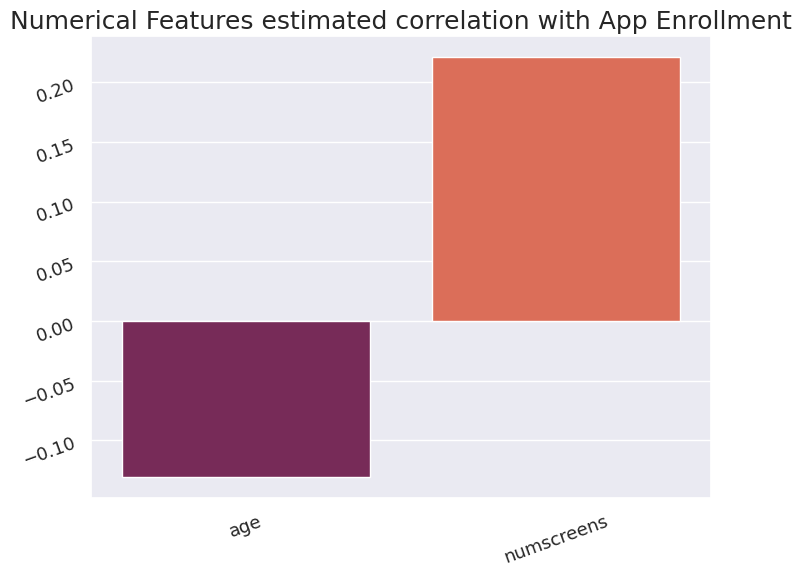

In [24]:
# Set Seaborn
sn.set()
# Set figure size and title
plt.figure(figsize=(8,6))
plt.title("Numerical Features estimated correlation with App Enrollment",fontsize=18)

# Seaborn barplot
ax = sn.barplot(x=df_users_numerical.columns, y=df_users_numerical.corrwith(df_users.enrolled), palette="rocket")
ax.tick_params(labelsize=13, labelrotation=20, color='k')

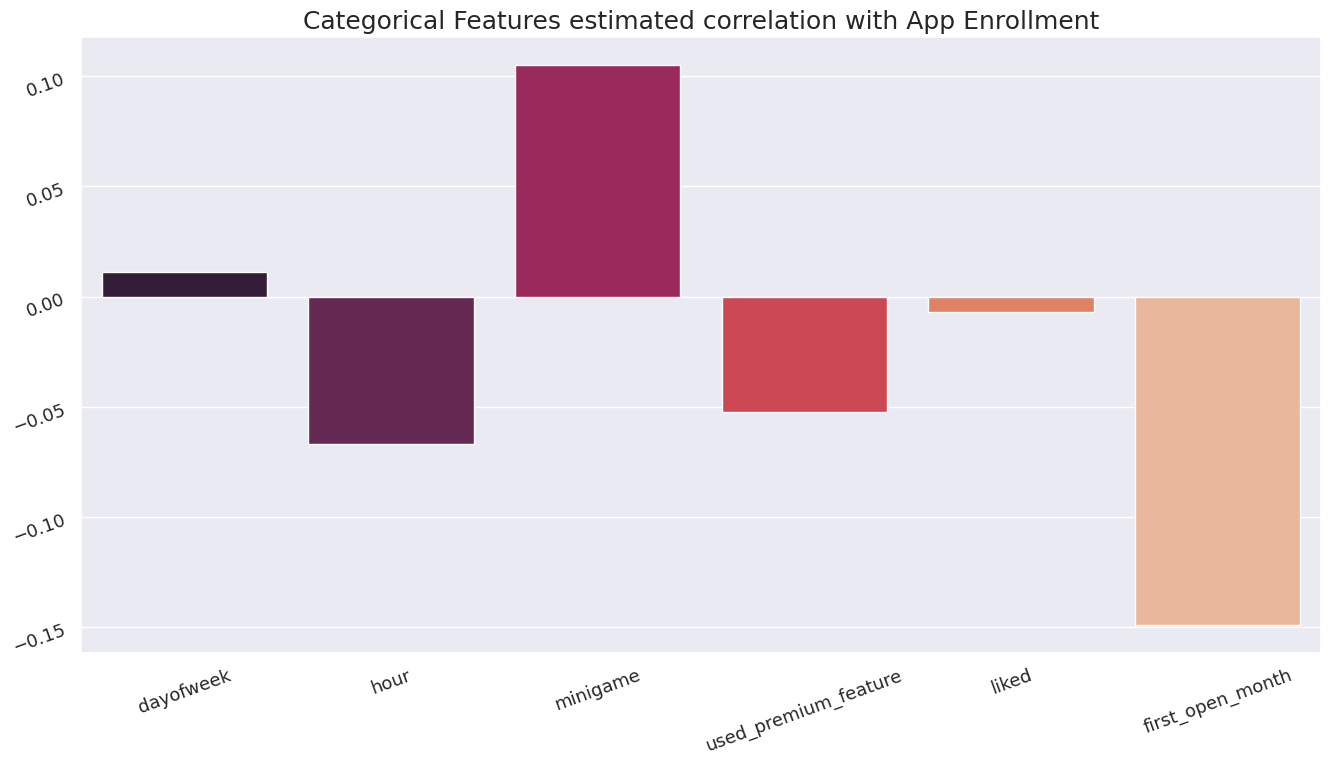

In [25]:
# Filter categorical fields for correlation with response
columns_to_drop = ['enrolled', 'enrolled_date_month', 'enrolled_date_hour']
df_cat_filter = df_cat_filter.drop(columns = columns_to_drop).copy()

# Set Seaborn
sn.set()
# Set the figure size & title
plt.figure(figsize=(16,8))
plt.title("Categorical Features estimated correlation with App Enrollment",fontsize=18)

# Seaborn barplot
ax = sn.barplot(x=df_cat_filter.columns, y=df_cat_filter.corrwith(df_users.enrolled), palette="rocket")
ax.tick_params(labelsize=13, labelrotation=20, color='k')

### Correlation Matrix

Estimate fields that are positively and negatively correlated to each other, checking for linear dependence

<Axes: >

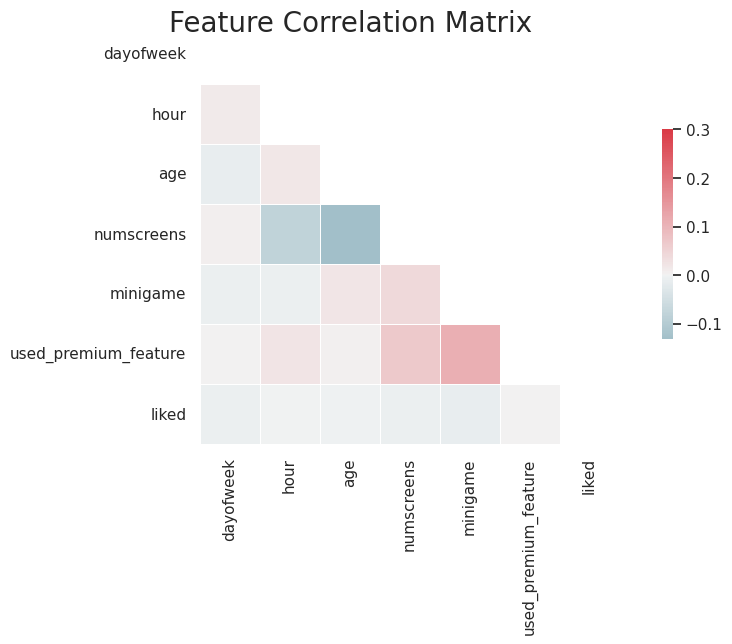

In [26]:
# Get features of interest
features_of_interest = ['dayofweek', 'hour', 'age', 'numscreens', 'minigame', 'used_premium_feature', 'liked']
df_users_matrix = df_users[features_of_interest]

# Seaborn 
sn.set(style='white', font_scale=1)

# Compute the correlation matrix
corr = df_users_matrix.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Setup the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))

# Adjust the top margin & title
f.subplots_adjust(top=0.95)
f.suptitle('Feature Correlation Matrix', fontsize = 20)

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={'shrink': .5})

# Feature Engineering ⚒️

### Target Transformation

Here we want to estimate a cut-off for enrollment wait time. This is because we need to have a way to validate the model for future datasets. For example, if the model was to predict an enrollment timeframe of 6 months, then we would have to wait 6 months to evaluate if the model was accurate or not.

In [27]:
# Calculate the difference between 'first_open' and 'enrolled_date', converting to hours
df_users['enroll_date_difference'] = (df_users.enrolled_date - df_users.first_open) / pd.Timedelta(hours=1)

Visualize Distributions

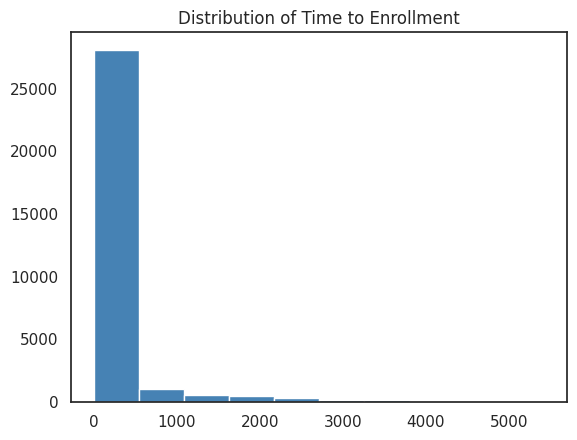

count    30978.000000
mean       190.937039
std        621.305688
min          0.000000
25%          0.043055
50%          0.118687
75%         16.743537
max       5434.686945
Name: enroll_date_difference, dtype: float64

In [28]:
# Plot a histogram of the resulting calculations
plt.hist(df_users['enroll_date_difference'].dropna().copy(), color="steelblue")
plt.title('Distribution of Time to Enrollment')
plt.show()

df_users['enroll_date_difference'].describe()

In [29]:
# Define wait times for user enrollment
time_to_enroll = [96, 72, 48, 24, 12, 1, 0.5, 0.25]
 
total_enrolled_count = df_users[df_users['enrolled'] == 1]['enrolled'].count()
print(f"Total number of users that enrolled: {total_enrolled_count}")

for time in time_to_enroll:
  # Filter enrolled data 
  enrolled_user_df = df_users[df_users['enroll_date_difference'] <= time].copy()
  # Get a count of enrolled users
  filtered_enroll_count = enrolled_user_df[enrolled_user_df['enrolled'] == 1]['enrolled'].count()
  # Calculate percentage 
  percentage = round((filtered_enroll_count / total_enrolled_count) * 100, 2)
  
  print(f"Count of users that enrolled within {time:4} hrs: {filtered_enroll_count}, Enrollment percentage: {percentage}%")


Total number of users that enrolled: 30978
Count of users that enrolled within   96 hrs: 25656, Enrollment percentage: 82.82%
Count of users that enrolled within   72 hrs: 25251, Enrollment percentage: 81.51%
Count of users that enrolled within   48 hrs: 24707, Enrollment percentage: 79.76%
Count of users that enrolled within   24 hrs: 23785, Enrollment percentage: 76.78%
Count of users that enrolled within   12 hrs: 22891, Enrollment percentage: 73.89%
Count of users that enrolled within    1 hrs: 20811, Enrollment percentage: 67.18%
Count of users that enrolled within  0.5 hrs: 19952, Enrollment percentage: 64.41%
Count of users that enrolled within 0.25 hrs: 18359, Enrollment percentage: 59.26%


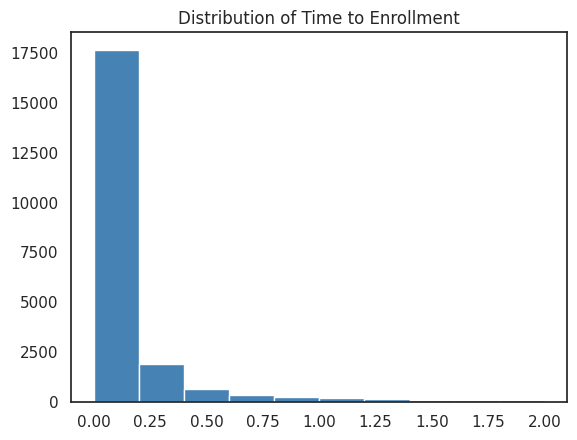

In [30]:
# Create another plot for time to enrollment, restricting to 2 hours
plt.hist(df_users['enroll_date_difference'].dropna().copy(), color="steelblue", range = [0, 2])
plt.title('Distribution of Time to Enrollment')
plt.show()

- We observe that approximately 67.18% of enrollments occur within the first hour of the user engaging with the application
- With a large majority of those enrollments occurring within the first 15 minutes
- This data is an excellent indicator of those likely to purchase a paid subscription
- However, we aim to predict those not likely to subscribe shortly after the free 24-hour trial period completes 
- Below we define a cut-off for enrollment wait time in which we modify our labels to only associate data to a positive class if the user subscribed within 72-hours

In [31]:
# Reset all users who enrolled after 72 hours to a negative 'enrolled' status for the model 
df_users.loc[df_users.enroll_date_difference > 72, 'enrolled'] = 0

# Remove data no longer needed
df_users = df_users.drop(columns=['enroll_date_difference', 'enrolled_date', 'first_open'])

- Visualize the **new class label distribution**

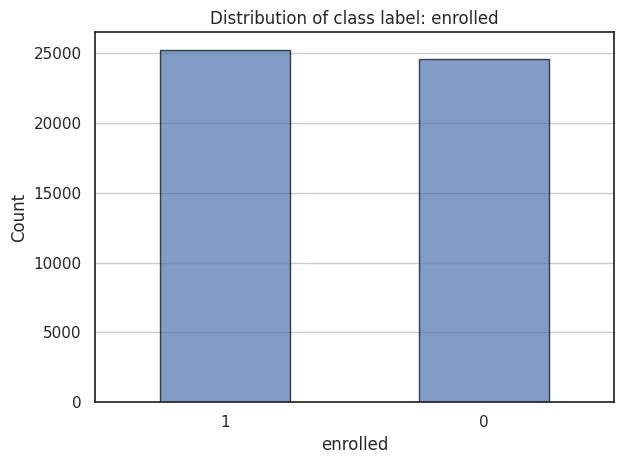

Users Enrolled:     25251 out of 49859
Users Not Enrolled: 24608 out of 49859


In [32]:
# Count the occurrences of each value
value_counts = df_users['enrolled'].value_counts()

# Create a bar plot
value_counts.plot(kind='bar', edgecolor='black', alpha=0.7)
plt.title("Distribution of class label: enrolled")
plt.xlabel("enrolled")
plt.ylabel("Count")
plt.xticks(rotation=0) # keep x-axis labels horizontal
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Get the number of samples
samples = df_users.shape[0]

# Display counts
print("Users Enrolled:    ", (df_users.enrolled == 1).sum(), f'out of {samples}')
print("Users Not Enrolled:",(df_users.enrolled == 0).sum(), f'out of {samples}')

- We observe a significant class imbalance is no longer present

### Feature Creation

Process **'screen_list'** data. First we import data for the most viewed screens as an array of values

In [33]:
top_screens = pd.read_csv("../data/processed/top_app_screens.csv").top_screens.values

- Create fields for the most viewed screens and record if they are present in the user's 'screen_list'
- Include a column for a count of other screens viewed by the user

In [34]:
# Add a comma to the string list, creating as many commas as there are strings for a later count
df_users['screen_list'] = df_users.screen_list.astype(str) + ','

for screen in top_screens:
    # Create a column for the popular screen and evaluate if present in the user's screen_list
    df_users[screen] = df_users.screen_list.str.contains(screen).astype(int)
    
    # Remove the top screen from the user's screen_list
    df_users['screen_list'] = df_users.screen_list.str.replace(screen+',', '')

# Create a column with a count for other screens viewed by the user
df_users['OtherScreens'] = df_users.screen_list.str.count(',')

# Drop the no longer needed 'screen_list'
df_users = df_users.drop(columns=['screen_list'])

- Inspect processed 'screen_list' results

In [35]:
# Adjust Pandas to show all columns and rows
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None) 

# Get a count of columns
print("Column Count: ", df_users.shape[1])

# Display stats
df_users.describe()

Column Count:  68


,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Credit3Dashboard,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,Credit3,Credit1,EditProfile,Credit2,Finances,CC3,Saving9,Saving1,Alerts,Saving8,Saving10,Leaderboard,Saving4,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,Saving7,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,Saving2,Saving6,Saving2Amount,Saving5,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,OtherScreens
count,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.0,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000,49859.000000
mean,186884.281855,3.028902,12.559277,31.733007,20.824545,0.107764,0.172065,0.506448,0.165005,0.505626,0.516958,0.292625,0.328647,0.524038,0.318699,0.472693,0.155960,0.422572,0.364568,0.340600,0.190076,0.143124,0.058966,0.200546,0.122245,0.086283,0.082934,0.104254,0.194288,0.047494,0.107603,0.076375,0.028741,0.058525,0.053872,0.072504,0.054012,0.047634,0.051204,0.043222,0.053210,0.044205,0.030366,0.040574,0.045849,0.0,0.043964,0.026334,0.039531,0.024268,0.025773,0.023286,0.030807,0.016186,0.019956,0.014360,0.019214,0.021741,0.029483,0.020438,0.095690,0.014180,0.016065,0.013338,0.013037,0.008163,0.007401,6.198139
std,107769.969568,2.031992,7.440773,10.806268,14.778414,0.310085,0.377441,0.499963,0.371189,0.499973,0.499717,0.454972,0.469726,0.499427,0.465977,0.499259,0.362821,0.493973,0.481314,0.473916,0.392365,0.350202,0.235564,0.400413,0.327572,0.280785,0.275785,0.305593,0.395655,0.212695,0.309882,0.265600,0.167080,0.234736,0.225767,0.259324,0.226044,0.212993,0.220417,0.203358,0.224454,0.205552,0.171593,0.197304,0.209160,0.0,0.205017,0.160129,0.194858,0.153883,0.158458,0.150811,0.172796,0.126190,0.139851,0.118973,0.137278,0.145839,0.169158,0.141493,0.294168,0.118234,0.125728,0.114717,0.113433,0.089981,0.085710,3.655980
min,13.000000,0.000000,0.000000,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93525.500000,1.000000,5.000000,24.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [36]:
# Drop the empty column observed above
df_users = df_users.drop(columns=['ProfileChildren '])

### Feature Transformations

- Aggregate correlated screen data

In [37]:
# Savings Screens funnel
savings_screens = ['Saving1', 'Saving2', 'Saving2Amount', 'Saving4', 'Saving5',
                   'Saving6', 'Saving7', 'Saving8', 'Saving9', 'Saving10']

df_users['SavingsScreens'] = df_users[savings_screens].sum(axis=1)
df_users = df_users.drop(columns=savings_screens)

# Credit Monitoring Screens funnel
credit_monitoring_screens = ['Credit1', 'Credit2', 'Credit3', 'Credit3Container', 'Credit3Dashboard']

df_users['CreditMonitoringScreens'] = df_users[credit_monitoring_screens].sum(axis=1)
df_users = df_users.drop(columns=credit_monitoring_screens)

# Credit Card Screens funnel
credit_card_screens = ['CC1', 'CC1Category', 'CC3']

df_users['CreditCardScreens'] = df_users[credit_card_screens].sum(axis=1)
df_users = df_users.drop(columns=credit_card_screens)

# Loan Screens funnel
loan_screens = ['Loan', 'Loan2', 'Loan3','Loan4']

df_users['LoanScreens'] = df_users[loan_screens].sum(axis=1)
df_users = df_users.drop(columns=loan_screens)

# Get a column count
column_names = df_users.columns.tolist()
print("Column Count: ", len(column_names))

# Display 
df_users.head()

Column Count:  49


,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,OtherScreens,SavingsScreens,CreditMonitoringScreens,CreditCardScreens,LoanScreens
0,235136,3,2,23,15,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,0,1


### Correlation Matrix

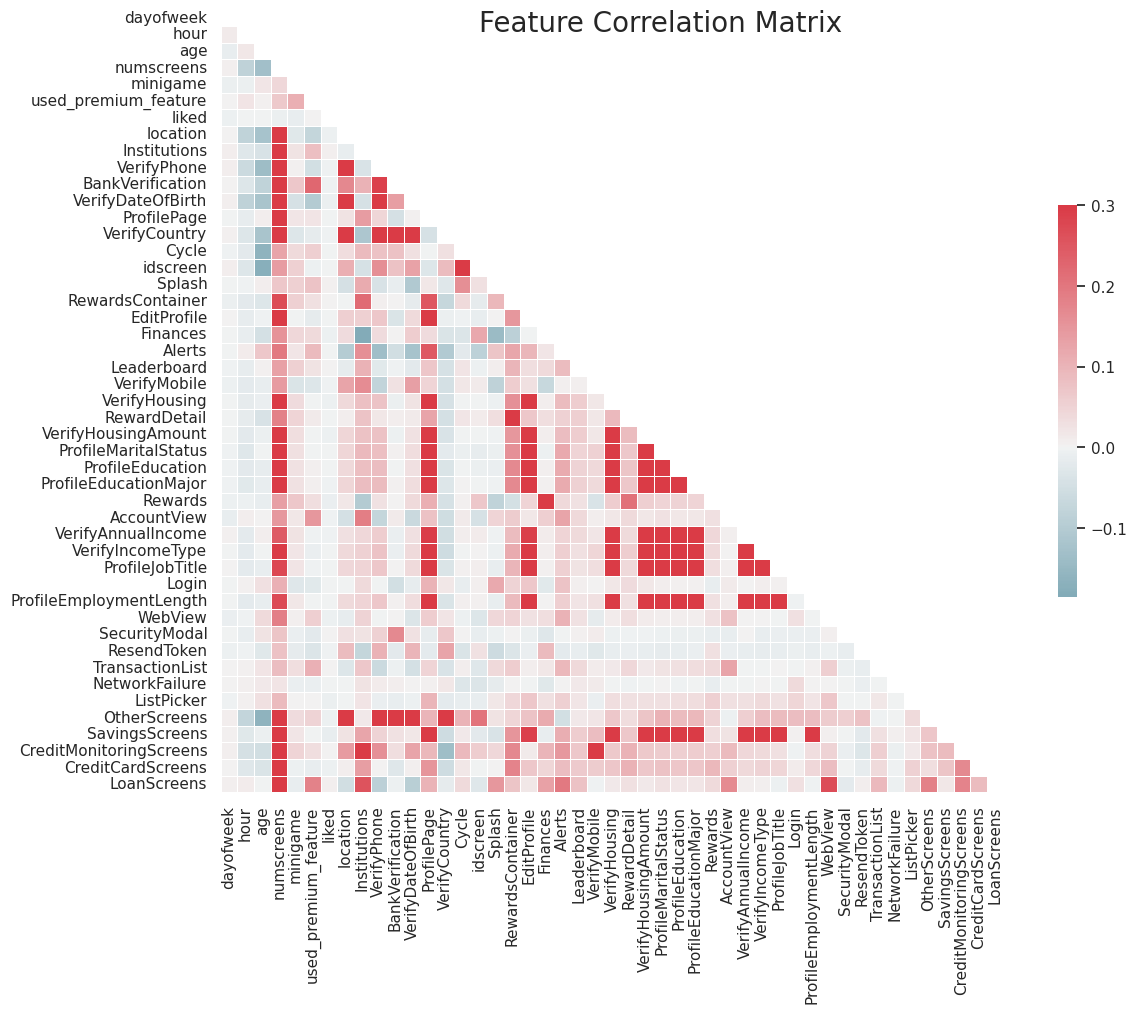

In [38]:
columns_to_exclude = ['user', 'enrolled']

# Get features of interest
features_of_interest = [col for col in df_users.columns if col not in columns_to_exclude]
df_users_matrix = df_users[features_of_interest]

# Seaborn 
sn.set(style='white', font_scale=1)

# Compute the correlation matrix
corr = df_users_matrix.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Setup the matplotlib figure
f, ax = plt.subplots(figsize=(14, 9))

# Adjust the top margin & title
f.subplots_adjust(top=0.98)  
f.suptitle('Feature Correlation Matrix', fontsize = 20)

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={'shrink': .5});

As anticipated, the newly added screen data shows an elevated positive correlation. We will evaluate these features in Model Building 🤖

## Save Dataset 💾

In [39]:
df_users.to_csv("../data/processed/new_app-user-data.csv", index=False)

## Conclusions

We estimate from the data above that if a user were to enroll in a paid subscription to the application, approximately 76.78 percent of them would have already done so by the end of the free 24-hour trial period. On the basis of that estimate, there is only a 23.22 percent chance the user will enroll in a paid subscription after the 24-hour trial without intervention.